[참조] 


Keyword extraction process: https://github.com/lovit/KR-WordRank



# Keyword extraction

Substring graph를 만들기 위하여 substring의 최소 등장 빈도수 (min count)와 substring의 최대 길이 (max length)를 입력해야 합니다.

In [2]:
! pip install  krwordrank

In [5]:
import pandas as pd

df = pd.read_csv('./Data/네이버_뉴스_코인_기사별_댓글.csv')

In [4]:
import sys
sys.path.append('../')

from krwordrank.word import KRWordRank
import krwordrank


Substring graph를 만들기 위하여 substring의 최소 등장 빈도수 (min count)와 substring의 최대 길이 (max length)를 입력해야 합니다.

In [7]:
min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)

기사 모든 댓글 하나로 합쳐줍니다. 

In [103]:
df['Comments'][0].split('\"')[1::2]

['내가 진심 궁금해서 물어봅니다.\\\\n저 루나 코인가지고 뭘한다고 사고파는건가요?',
 '루나2에 당한 사람들 진짜 이번 생은 포기해라.... 도끼로 셀프 머리 내려치기 해서 죽는게 맞다',
 '형이 팩트를 알려준다 권도형은 CEO가 아니고 그냥 사기꾼이다',
 '루나2를 산사람이 있어?',
 '똑같은 사기에 2번 당하는 인간들은 그냥 저 사기극의 공범이나 같은거지~~ 어차피 본인들도 사기인거 알면서나만 아니면 된다는 식으로 한탕 해먹어보자는 심리일테니~~',
 '이쯤되면 언제 쯤 구속될지 궁금해진다.',
 '루나2 산 뇌없충은 없것지?',
 '사업이 잘될때 겸손하게 행동하며 아군을 만들어야 되는데 ~ 반대짓을 하니 쪽망이군 ~ 한국서만 그랬다면 목숨이라도 부지 할텐데 ~ 전세계 쪽망이라  저 세상 가는것도 시간 문제네 ~  한국 망신 다시키고  이젠 잠수타버리고 ~  가족들은 어떡 할껴 ~ 잠수 자체가 사기꾼 인정되버리네~ 심히 훗날 결과가 궁금하다',
 '사실 루나 코인은 불법 도박사이트와 다른 것이 없다는...',
 '지능이 문제다',
 '숏 레버리지 20배잡고 77ㅓ억ㅋㅋㅋㅋㅋㅋㅋㅋㅋ감사합니다ㅠㅠㅠ진짜ㅠㅠㅠㅠㅠ',
 '희대의 개사기꾼 투자자둘 완전 개털됨 루나코인 공중분해',
 '이사람과 가족들 경찰이 잡아야지 이상한 사람들이 먼저 잡으면 온 가족 친척들과 함께 곱게는 못죽을듯.... 국내 이야기도 아니고 전 세계상대로 이런 일이 벌어진건데...',
 '이거 당연히 권력층이 연계되어있는데 잡히겠어? 저 CEO라는 애만 잡겠지. 잡으려면 다잡아야지. 애초에 초기투자금을 누가 준비해주고 올려준사람도 있을건데말야. 꿀 빨고 이미 로비다했을듯. 우리나라 한국이 부끄러워질수도. 윤석열 대통령이 이런건 바로잡아줫으면 좋겠다. 사람에게 충성하지않고 나라에게 충성한다는 거. 멋진말. 진짜 멋지게 기억에 남는 사람이 되었으면 좋겠다',
 '왜사지',
 'https://n.news.naver.com/article/421/0006126955?sid=105\\\\n\\

In [121]:
comment_list = []

for i in range(len(df['Comments'])):
    comment_list.append(df['Comments'][i].split('\"')[1::2])
     
all_comment_text = [] 

for i in range(len(comment_list)):
     all_comment_text.extend(comment_list[i])

In [124]:
all_comment_text

['내가 진심 궁금해서 물어봅니다.\\\\n저 루나 코인가지고 뭘한다고 사고파는건가요?',
 '루나2에 당한 사람들 진짜 이번 생은 포기해라.... 도끼로 셀프 머리 내려치기 해서 죽는게 맞다',
 '형이 팩트를 알려준다 권도형은 CEO가 아니고 그냥 사기꾼이다',
 '루나2를 산사람이 있어?',
 '똑같은 사기에 2번 당하는 인간들은 그냥 저 사기극의 공범이나 같은거지~~ 어차피 본인들도 사기인거 알면서나만 아니면 된다는 식으로 한탕 해먹어보자는 심리일테니~~',
 '이쯤되면 언제 쯤 구속될지 궁금해진다.',
 '루나2 산 뇌없충은 없것지?',
 '사업이 잘될때 겸손하게 행동하며 아군을 만들어야 되는데 ~ 반대짓을 하니 쪽망이군 ~ 한국서만 그랬다면 목숨이라도 부지 할텐데 ~ 전세계 쪽망이라  저 세상 가는것도 시간 문제네 ~  한국 망신 다시키고  이젠 잠수타버리고 ~  가족들은 어떡 할껴 ~ 잠수 자체가 사기꾼 인정되버리네~ 심히 훗날 결과가 궁금하다',
 '사실 루나 코인은 불법 도박사이트와 다른 것이 없다는...',
 '지능이 문제다',
 '숏 레버리지 20배잡고 77ㅓ억ㅋㅋㅋㅋㅋㅋㅋㅋㅋ감사합니다ㅠㅠㅠ진짜ㅠㅠㅠㅠㅠ',
 '희대의 개사기꾼 투자자둘 완전 개털됨 루나코인 공중분해',
 '이사람과 가족들 경찰이 잡아야지 이상한 사람들이 먼저 잡으면 온 가족 친척들과 함께 곱게는 못죽을듯.... 국내 이야기도 아니고 전 세계상대로 이런 일이 벌어진건데...',
 '이거 당연히 권력층이 연계되어있는데 잡히겠어? 저 CEO라는 애만 잡겠지. 잡으려면 다잡아야지. 애초에 초기투자금을 누가 준비해주고 올려준사람도 있을건데말야. 꿀 빨고 이미 로비다했을듯. 우리나라 한국이 부끄러워질수도. 윤석열 대통령이 이런건 바로잡아줫으면 좋겠다. 사람에게 충성하지않고 나라에게 충성한다는 거. 멋진말. 진짜 멋지게 기억에 남는 사람이 되었으면 좋겠다',
 '왜사지',
 'https://n.news.naver.com/article/421/0006126955?sid=105\\\\n\\

In [127]:
len(all_comment_text)

19329

메모장에 넣어봅시다.

with open을 쓰면 간단하게 메모장에 저장할 수 있습니다.

In [133]:
with open('./Data/all_comments.txt','w',encoding='UTF-8') as f:
    
        for comment in all_comment_text:
            f.write(comment+'\n')

메모장에서 모든 기사 댓글을 다시 가져옵니다. 

In [247]:
def get_texts(fname):
    # 튜토리얼에서 이용하는 `fname` 파일은 영화평과 평점이 \t 으로 구분된 two column tsv 파일입니다.
    # 예시는 이 cell 의 output 을 참고하세요.
    with open(fname, encoding='utf-8') as f:
        docs = [doc.lower().replace('\n','').replace('\\\\n','').split('\t') for doc in f]        
    return docs

file = './Data/all_comments.txt'
TXT = get_texts(file) # 이중리스트 존재

texts= [text for texts in TXT for text in texts] # 이중리스트 제거

In [251]:
texts

['내가 진심 궁금해서 물어봅니다.저 루나 코인가지고 뭘한다고 사고파는건가요?',
 '루나2에 당한 사람들 진짜 이번 생은 포기해라.... 도끼로 셀프 머리 내려치기 해서 죽는게 맞다',
 '형이 팩트를 알려준다 권도형은 ceo가 아니고 그냥 사기꾼이다',
 '루나2를 산사람이 있어?',
 '똑같은 사기에 2번 당하는 인간들은 그냥 저 사기극의 공범이나 같은거지~~ 어차피 본인들도 사기인거 알면서나만 아니면 된다는 식으로 한탕 해먹어보자는 심리일테니~~',
 '이쯤되면 언제 쯤 구속될지 궁금해진다.',
 '루나2 산 뇌없충은 없것지?',
 '사업이 잘될때 겸손하게 행동하며 아군을 만들어야 되는데 ~ 반대짓을 하니 쪽망이군 ~ 한국서만 그랬다면 목숨이라도 부지 할텐데 ~ 전세계 쪽망이라  저 세상 가는것도 시간 문제네 ~  한국 망신 다시키고  이젠 잠수타버리고 ~  가족들은 어떡 할껴 ~ 잠수 자체가 사기꾼 인정되버리네~ 심히 훗날 결과가 궁금하다',
 '사실 루나 코인은 불법 도박사이트와 다른 것이 없다는...',
 '지능이 문제다',
 '숏 레버리지 20배잡고 77ㅓ억ㅋㅋㅋㅋㅋㅋㅋㅋㅋ감사합니다ㅠㅠㅠ진짜ㅠㅠㅠㅠㅠ',
 '희대의 개사기꾼 투자자둘 완전 개털됨 루나코인 공중분해',
 '이사람과 가족들 경찰이 잡아야지 이상한 사람들이 먼저 잡으면 온 가족 친척들과 함께 곱게는 못죽을듯.... 국내 이야기도 아니고 전 세계상대로 이런 일이 벌어진건데...',
 '이거 당연히 권력층이 연계되어있는데 잡히겠어? 저 ceo라는 애만 잡겠지. 잡으려면 다잡아야지. 애초에 초기투자금을 누가 준비해주고 올려준사람도 있을건데말야. 꿀 빨고 이미 로비다했을듯. 우리나라 한국이 부끄러워질수도. 윤석열 대통령이 이런건 바로잡아줫으면 좋겠다. 사람에게 충성하지않고 나라에게 충성한다는 거. 멋진말. 진짜 멋지게 기억에 남는 사람이 되었으면 좋겠다',
 '왜사지',
 'https://n.news.naver.com/article/421/0006126955?sid=10560배 튀고 1/9 나

In [249]:
len(texts) # 19329개의 댓글

19329

KR-WordRank는 PageRank 와 비슷한 graph ranking 알고리즘을 이용하여 단어를 추출합니다 (HITS algorithm 을 이용합니다). Substring graph에서 node (substrig) 랭킹을 계산하기 위하여 graph ranking 알고리즘의 parameters 가 입력되야 합니다.

In [252]:
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

Graph ranking 이 높은 노드들(substrings)이 후처리 과정을 거쳐 단어로 출력됩니다. 기사 댓글 데이터에서 키워드 (단어) 추출을 한 결과는 다음과 같습니다.

In [256]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:10]:
        print('%8s:\t%.4f' % (word, r))

      코인:	68.8890
      진짜:	50.1450
      ㅋㅋ:	49.8074
      사기:	42.8488
      그냥:	34.5001
      사람:	27.9664
      이런:	26.7154
      이제:	25.7002
      루나:	25.6101
      아니:	23.5171


Python 의 wordcloud package 를 이용하면 키워드에 관한 word cloud figure 를 그릴 수 있습니다.

Figure 에 나타내지 않을 일반적인 단어 (stopwords) 를 제거하여 passwords 를 만듭니다. dict 형식으로 {단어:점수} 형식이어야 합니다.


In [257]:
stopwords = {'많다','역시','아직도','누가','많이','한다','\\','지금','바로','10','절대','그만','나도', '무슨','없다','어떻게','같은','만들어','대놓고', '코인','차라리','근데','아닌','진짜','이게','과연','하는', '때문에','ㅋㅋ','사람', '그냥','이런','이제','아니','얼마나','가지고','있는','주변에','다주니','없는','내가','그렇게','수많은','저런','돈이'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

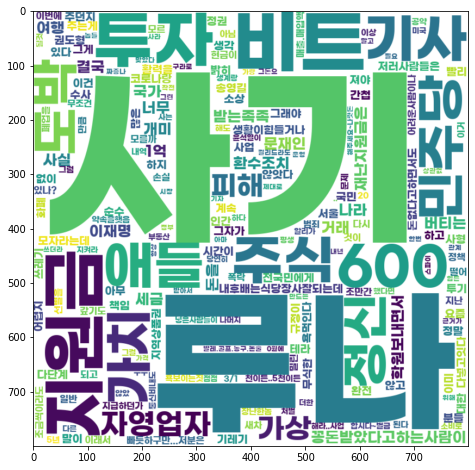

In [258]:
#! pip install wordcloud
from wordcloud import WordCloud

# Set your font path
font_path = './Data/GmarketSansTTFBold.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [180]:
# fig.savefig('./all_comments_wordcloud.png')

# Key-sentence extraction

 KR-WordRank 에서는 keywords 를 많이 포함한 문장을 핵심 문장으로 선택합니다.
 
문장을 추출하는 원리는 추출된 키워드의 랭크값을 이용하여 키워드 벡터를 만든 뒤, 코싸인 유사도 기준으로 입력된 문장 벡터가 키워드 벡터와 유사한 문장을 선택하는 것입니다.

summarize_with_sentences 함수에 texts 를 입력하면 KR-WordRank 를 학습하여 키워드와 이를 이용한 핵심 문장을 선택합니다.

In [302]:
from krwordrank.sentence import summarize_with_sentences

keywords, sents = summarize_with_sentences(texts, num_keywords=100, num_keysents=15)

keywords 에는 KR-WordRank 로부터 학습된 num_keywords 개수의 키워드와 이들의 랭크 값이 dict{str:float} 형식으로 저장되어 있습니다.

In [303]:
keywords

{'코인': 68.88898862326393,
 '진짜': 50.14500516816479,
 'ㅋㅋ': 49.80743359116434,
 '사기': 42.84876877341609,
 '그냥': 34.50009989145544,
 '사람': 27.96640716073505,
 '이런': 26.715425593561775,
 '이제': 25.70017821427116,
 '루나': 25.610100228353538,
 '아니': 23.51708853966222,
 '비트': 22.76887588781481,
 '얼마나': 22.149192075193334,
 '지원금': 20.288848721069428,
 '가지고': 18.957039577710365,
 '투자': 18.03054339121846,
 '주변에': 17.169366349842416,
 '있는': 17.01959301862284,
 '다주니': 16.067648449536907,
 '10': 15.624189344255752,
 '과연': 15.183946993326604,
 '내가': 15.024008846521845,
 '없는': 14.972960570541508,
 '하는': 14.647192479625144,
 '차라리': 13.977775756111482,
 '그렇게': 13.845291732363277,
 '수많은': 13.563977192410897,
 '저런': 13.173601575166979,
 '주식': 13.036878680536876,
 '돈이': 13.010907345024359,
 '600': 12.922458307433333,
 '기사': 12.858378607652785,
 '이게': 12.729650517579357,
 '애들': 12.437408297663849,
 '많다': 12.00065128132212,
 '근데': 11.990393416480865,
 '같은': 11.749346260935548,
 '무슨': 11.747107224578086,
 '많이

sents 에는 num_sents 개의 핵심 문장이 list of str 형식으로 포함되어 있습니다.

In [301]:
sents

['주변에 지원금 1000만원받아서 받는족족 주식에 다넣고잇다 생활이힘들거나 수입이적거나한거 조금도없고 돈아주잘벌고 애들 발레.골프.농구.논술 학원보내면서 돈없다고하면서도 수입보면 억대연봉은된ㄷㅏ 근데 지원금은 계속나오더라.. 진짜 어려운사람이나 피해본사람한터 지원금가게 기준정해서 지급하면 모를까 이건뭐 표팔이용이니 코인.주식에 넣은사람들이 과연 진짜소상공인일까?어려운사람일까? 참 🐕 같은 정책 공약만하고 조희팔보다 더한 윤통 어째 공약을 대놓고 표팔이로쓰냐 약속을햇음  지켜라',
 '코인은 디지털화폐가 아니라 폰지사기맞아. 돌리고 돌리다가 누군가가 나중에 폭탄맞는거지. 비트코인 생긴지가 언젠데 솔직히 현재 실생활에 적용되어 쓸수있는게 얼마나 있냐??? 팩트는 디지털쓰레기다. 그냥 투자라는 미명하에 투기꾼들이 모여있는 사이버도박장 그정도의 수준일뿐. 주식은 실체가 있지만 코인은 실체가없다. 느그들이 가지고 있는코인으로 도대체 뭘할수있고 그회사 가치평가나 할수는 있냐?ㅎㅎ 위에말한것처럼 그냥 사이버도박장일 뿐이야.',
 '이번 투표가 무의미하다고 봄. 테라 입장에서는 가치 보존을 위해 비트코인을 팔았다고 하는데, 그렇게 되면 투입된 자금만큼 테라에서 투표에 영향을 미칠수 있었던거 아님? 그게 아니고 진짜 사기라 해도 저점 매수자나 패닉셀에 대응 못한 사람들의 치기로 통과 된거라는 거 아님? 다음 세대의 성공을 바라는 마음도 있을수 있겠지만, 상장 이후 바로 손해복구하고 뜨려고 하거나, 테라에서 더 크게 해먹으려는 마음이 터 큰것일수도.',
 '이거 의미없어1. 이미 상장 첫주 다 해처먹는다.투자금하고 거래소에서 받아처먹는 피 수수료 등등 다 상장하고 처음에 해처먹는걸로 나온다2. 지금도 이미 있던시스템인데, 6개월?ㅋㅋ 뭐가다른지?3. 루나는 시작때 사기치는거 검증못해서 상장했냐?그냥 돈받아처먹고 백서 쪼가리 하나보고 그냥 한거지그냥 코인자체가 이미 쓰래기라니까 아무런 능력도 기술도없는데, 종이 쪼가리 한장이면 사업이됨공무원하고 똑같지',
 '저런거 만든 놈들,

몇 가지 패러매터를 추가할 수 있습니다. 길이가 지나치게 길거나 짧은 문장을 제거하기 위해 penalty 함수를 정의합니다. 

아래는 길이가 10 글자부터 300 글자인 문장을 선호한다는 의미입니다. stopwords 는 키워드에서 제거합니다. 이들은 키워드벡터를 만들 때에도 이용되지 않습니다. 또한 키워드 벡터와 유사한 문장을 우선적으로 선택하다보면 이전에 선택된 문장과 중복되는 문장들이 선택되기도 합니다. 이는 diversity 를 이용하여 조절할 수 있습니다. diversity 는 코싸인 유사도 기준 핵심문장 간의 최소 거리 입니다. 이 값이 클수록 다양한 문장이 선택됩니다.

In [304]:
penalty = lambda x:0 if (10 <= len(x) <= 300) else 1
stopwords = {'많다','역시','아직도','누가','많이','한다','\\','\\\\','하고','이건','있다','지켜라','너무','결국','버티는','사실','지금','바로','10','절대','그만','나도', '무슨','없다','어떻게','같은','만들어','대놓고', '코인','차라리','근데','아닌','진짜','이게','과연','하는', '때문에','ㅋㅋ','사람', '그냥','이런','이제','아니','얼마나','가지고','있는','주변에','다주니','없는','내가','그렇게','수많은','저런','돈이'}


keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=15,
    verbose=False
)

핵심 문장도 길이가 10 ~ 300 글자인 문장들을 선호합니다.

In [306]:
sents

['대체 크립토가 왜 가상화폐라 기사에서 까내리는걸까.당연히 어느 사업이든 경쟁력없고 가치가 없다면 사라져야지90퍼센트 넘는 쓸모없는 스캠 암호화폐들은 없어지는게 맞다. 그럼 남는 메이져에 투자하면 된다. 기억해라. 쓰레기 사기라고 불리던 비트 천원 미만. 만원때가 있었다.',
 '송트남 이거 완전 정신까지 가출햇네... 이번에 권도형이란 사람이 루나 코인 만들때 20%수익 보장을 말하며 폰지사기가 거론되어서 검찰, 경찰 수사 들어가고있는데! 이분은 정신을 베트남에 두고 왔는지.. 아무런 생각이 없이 사는사람같음... 코인은 싸게사서 비싸게 파는건데... 그 물량을 누가 받을것이며? 하락하면 그 손실을 누가 보상할겁니까!! 정신나간 인간이네.!!  여당의 전직 당대표가... 폰지사기 사건을 보면서도.. 정신을 못차리네. 서울 시민들을 개돼지로 보나... 송트남씨! 머리 한대 맞더니..금치산자 되셨습니까!!',
 '주변에 지원금 1000만원받아서 받는족족 주식에 다넣고잇다 생활이힘들거나 수입이적거나한거 조금도없고 돈아주잘벌고 애들 발레.골프.농구.논술 학원보내면서 돈없다고하면서도 수입보면 억대연봉은된ㄷㅏ 근데 지원금은 계속나오더라.. 진짜 어려운사람이나 피해본사람한터 지원금가게 기준정해서 지급하면 모를까 이건뭐 표팔이용이니 코인.주식에 넣은사람들이 과연 진짜소상공인일까?어려운사람일까? 참 🐕 같은 정책 공약만하고 조희팔보다 더한 윤통 어째 공약을 대놓고 표팔이로쓰냐 약속을햇음  지켜라',
 '공매도 천국 헬조선 증시다. 오늘도 듣보잡 세력, 작전주만 상승하고 공매도 많은 주식은 여지없이 추락하고 있다. 미국 증시 상승하면 디커플링 하락하면 커플링 ... 완전히 쓰레기 사기도박 천국 헬조선 증시다. 오죽하면 국내 시장에 염증을 느끼고 떠난 동학개미들이 미증시로 떠났을까?? 이젠 국내서 코피 터지고 해외투자에서도 쌍코피 터지고 있다. 이것은 눈앞의 이익을 좆는 증권사와 개관들 때문이다. 주식시장 활성화하면 주식 투자 인구 많이 유입 되어서 주식시장도 안정되고 부동산

만약 '@@' 이라는 단어가 포함된 문장도 핵심 문장에서 제거하고 싶다면 아래처럼 penalty 함수를 변경할 수 있습니다.

In [288]:
penalty=lambda x:0 if (10 <= len(x) <= 300 and not '@@' in x) else 1,
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=15,
    verbose=False
)



In [293]:
for i in range(len(sents)):
    print(i, sents[i], '\n')

0 대체 크립토가 왜 가상화폐라 기사에서 까내리는걸까.당연히 어느 사업이든 경쟁력없고 가치가 없다면 사라져야지90퍼센트 넘는 쓸모없는 스캠 암호화폐들은 없어지는게 맞다. 그럼 남는 메이져에 투자하면 된다. 기억해라. 쓰레기 사기라고 불리던 비트 천원 미만. 만원때가 있었다. 

1 송트남 이거 완전 정신까지 가출햇네... 이번에 권도형이란 사람이 루나 코인 만들때 20%수익 보장을 말하며 폰지사기가 거론되어서 검찰, 경찰 수사 들어가고있는데! 이분은 정신을 베트남에 두고 왔는지.. 아무런 생각이 없이 사는사람같음... 코인은 싸게사서 비싸게 파는건데... 그 물량을 누가 받을것이며? 하락하면 그 손실을 누가 보상할겁니까!! 정신나간 인간이네.!!  여당의 전직 당대표가... 폰지사기 사건을 보면서도.. 정신을 못차리네. 서울 시민들을 개돼지로 보나... 송트남씨! 머리 한대 맞더니..금치산자 되셨습니까!! 

2 주변에 지원금 1000만원받아서 받는족족 주식에 다넣고잇다 생활이힘들거나 수입이적거나한거 조금도없고 돈아주잘벌고 애들 발레.골프.농구.논술 학원보내면서 돈없다고하면서도 수입보면 억대연봉은된ㄷㅏ 근데 지원금은 계속나오더라.. 진짜 어려운사람이나 피해본사람한터 지원금가게 기준정해서 지급하면 모를까 이건뭐 표팔이용이니 코인.주식에 넣은사람들이 과연 진짜소상공인일까?어려운사람일까? 참 🐕 같은 정책 공약만하고 조희팔보다 더한 윤통 어째 공약을 대놓고 표팔이로쓰냐 약속을햇음  지켜라 

3 공매도 천국 헬조선 증시다. 오늘도 듣보잡 세력, 작전주만 상승하고 공매도 많은 주식은 여지없이 추락하고 있다. 미국 증시 상승하면 디커플링 하락하면 커플링 ... 완전히 쓰레기 사기도박 천국 헬조선 증시다. 오죽하면 국내 시장에 염증을 느끼고 떠난 동학개미들이 미증시로 떠났을까?? 이젠 국내서 코피 터지고 해외투자에서도 쌍코피 터지고 있다. 이것은 눈앞의 이익을 좆는 증권사와 개관들 때문이다. 주식시장 활성화하면 주식 투자 인구 많이 유입 되어서 주식시장도 안정되고 부동산

In [307]:
with open('./Data/comments_keywords.txt','w',encoding='UTF-8') as f:
    for keyword, rank in keywords.items():
        f.write(f'{keyword} : {rank}\n')

In [309]:
with open('./Data/comments_keysentences.txt','w',encoding='UTF-8') as f:
    for sentence in sents:
        f.write(sentence + '\n')

In [ ]:
# '사기'라는 단어가 가장 핵심 단어